# Project: Create a Convolutional Neural Network
- We will create a model on the [CIFAR-10 dataset](https://www.cs.toronto.edu/%7Ekriz/cifar.html)

### Step 1: Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Download the CIFAR10 dataset
- Excute the cell below

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### Step 3: Normalize the pixels
- Divide the **train_images** and **test_images** with 255 to normalize them between 0 and 1.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Step 4: Get the class names of the labels
- Make a class name conversion.
    - HINT: make a list with the name **class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']**
- How to use the name conversion.
    - **class_name[int(train_labels[index])]**
- How to show an image
    - **plt.imshow(train_image[index])**

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

'truck'

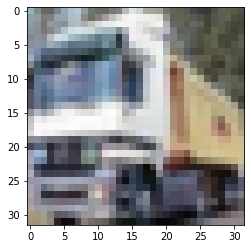

In [5]:
index = 1
plt.imshow(train_images[index])
class_names[int(train_labels[index])]

### Step 5: Create a model
- Create a **Sequential** model
    - **Conv2D** with 32 and (3, 3),  **activation='rela', input_shape=(32, 32, 3)**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='rela'**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='rela'**
    - **Flatten**
    - **Dense** with 64 nodes with **input_dim=4, activaition='relu'**
    - **Dense** with 10 (the output node)**
- Complie the model with **optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 6: Train the model
- Fit the model with **train_images, train_labels, epochs=10** and **validation_data=(test_images, test_labels)**

In [7]:
model.fit(train_images, train_labels, epochs=10, 
          validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4984 - accuracy: 0.4511 - val_loss: 1.2806 - val_accuracy: 0.5480
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1234 - accuracy: 0.6026 - val_loss: 1.0855 - val_accuracy: 0.6173
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9700 - accuracy: 0.6595 - val_loss: 0.9820 - val_accuracy: 0.6557
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8759 - accuracy: 0.6938 - val_loss: 0.9405 - val_accuracy: 0.6797
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7974 - accuracy: 0.7209 - val_loss: 0.8668 - val_accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7396 - accuracy: 0.7388 - val_loss: 0.8995 - val_accuracy: 0.6979
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6922 - accuracy: 0.7558 - val_loss: 0.8403 -

### Stpe 7: Test the model
- Make predictions
    - assign the predictions of test_images to a variable
- How to test visually
    - Assign **index=0**
    - Plot the image with **plt.imshow(test_images[index])**
    - See the label from prediction by mapping it from **class_names**

In [8]:
y_pred = model.predict(test_images)

'ship'

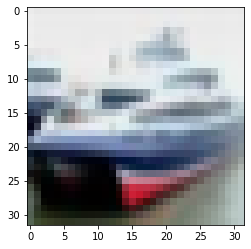

In [9]:
index = 1
plt.imshow(test_images[index])
class_names[y_pred[index].argmax()]

### Step 8 (Optional): Improve the model
- Try to play around with the model to improve the score

In [10]:
model.evaluate(test_images, test_labels, verbose=0)

[0.8709874153137207, 0.7195000052452087]

In [11]:
y_pred_labels = y_pred.argmax(axis=1)

In [12]:
y_pred_labels

array([3, 8, 8, ..., 5, 4, 7])

In [13]:
(y_pred_labels == test_labels.T).sum()/len(y_pred_labels)

0.7195